# 6.2: Exploring relationships

## This script contains the following:

### 1. Importing libraries and data

### 2. Data cleaning

* #### Data consistancy checks

### 3. Exploring relationships

* #### Correlation

* #### Scatterplots

* #### Pair plot

* #### Categorical plot

### 4. Revisiting questions asked in Task 6.1

### 5. Hypotheses

### 1. Importing libraries and data

In [70]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import openpyxl
import os

In [71]:
# Check matplotlib version as version 3.1.1. may cause problems with how heatmaps appear

matplotlib.__version__

'3.8.4'

In [72]:
# Ensure charts created are displayed in the notebook without the need to call them

%matplotlib inline

In [73]:
# Create path

path = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project'

In [74]:
# Import data

df = pd.read_csv(os.path.join(path, '02. Data', 'Original data', 'Travelpac 2023 numerical UK only.csv'), index_col = False)

### 2. Data cleaning

Although I had 4 quantitative variables in my dataset, I changed the data type of some of the quantitative variables while originally working through this task so that I could have more data to choose from. I had got quite far into the task before I decided that I would get more meaningful results with even more variables. Therefore, I decided to start again!

My original data set had a worksheet where numerical codes were used, as opposed to written labels. I have decided to use this dataset instead and start afresh, using the cleaning advice given by my tutor to handle some of the issues and untidiness in my code from the previous exercise. I have decided to do this in this notebook to show that I have adjusted my way of working.

In [75]:
df.shape

(16833, 14)

In [76]:
df.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,expend,sample
0,2023,1,1,1,10,1,1,1,1,2,4327.762,30294.331,2473496.413,3
1,2023,1,1,1,10,1,1,1,2,1,1482.093,4446.28,395718.932,1
2,2023,1,1,1,10,1,1,1,2,2,2356.4,17976.891,1885922.404,2
3,2023,1,1,1,10,1,1,2,1,2,10278.171,52140.224,8260875.139,6
4,2023,1,1,1,10,1,1,2,2,1,5241.563,15724.689,847512.731,3


In [77]:
df.tail()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,expend,sample
16828,2023,4,1,3,42,2,2,4,1,2,1129.469,6776.811,2222794.042,1
16829,2023,4,1,3,42,4,1,6,2,2,1129.469,5647.343,0.000,1
16830,2023,4,1,3,42,4,1,7,2,2,2258.937,15812.559,1411835.647,2
16831,2023,4,1,3,45,1,1,6,2,3,1129.469,16942.028,1411835.647,1
16832,2023,4,1,3,54,4,1,5,2,3,1129.469,22589.37,2258937.034,1


#### Data consistancy checks

In [78]:
# Check data types

df.dtypes

Year          int64
quarter       int64
ukos          int64
mode          int64
country       int64
purpose       int64
package       int64
Age           int64
Sex          object
duration      int64
visits       object
nights       object
expend      float64
sample       object
dtype: object

In [79]:
# Check for mixed data types

for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].map(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

As I already know that there are columns with misssing values in various forms, I will deal with them before converting the data type of the quantitative variables.

In [80]:
# Replace problematic values with NaN
   
df.replace({'#NULL!': np.nan, 'D/K': np.nan, 'Stay not known': np.nan}, inplace=True)

In [81]:
# Check for missing values
   
missing_values = df.isnull().sum()
print(missing_values)

Year          0
quarter       0
ukos          0
mode          0
country       0
purpose       0
package       0
Age           0
Sex         369
duration      0
visits        8
nights        8
expend        0
sample       11
dtype: int64


In [82]:
# Convert all relevant columns to the correct type after handling missing values

df['Sex'] = df['Sex'].astype(float)
df['visits'] = df['visits'].astype(float)
df['nights'] = df['nights'].astype(float)
df['expend'] = df['expend'].astype(float)
df['sample'] = df['sample'].astype(float)

In [83]:
# Check data types

df.dtypes

Year          int64
quarter       int64
ukos          int64
mode          int64
country       int64
purpose       int64
package       int64
Age           int64
Sex         float64
duration      int64
visits      float64
nights      float64
expend      float64
sample      float64
dtype: object

In [84]:
# Rename columns for uniformity

df.rename(columns={
       'quarter': 'Quarter',
       'ukos': 'UKOS',
       'mode': 'Mode',
       'country': 'Country',
       'purpose': 'Purpose',
       'package': 'Package',
       'duration': 'Duration of trip',
       'visits': 'Number of visits',
       'nights': 'Number of nights',
       'expend': 'Expenditure',
       'sample': 'Sample'
   }, inplace=True)

In [85]:
df.columns

Index(['Year', 'Quarter', 'UKOS', 'Mode', 'Country', 'Purpose', 'Package',
       'Age', 'Sex', 'Duration of trip', 'Number of visits',
       'Number of nights', 'Expenditure', 'Sample'],
      dtype='object')

In [86]:
# Check missing value in 'Expenditure'

df_nan_Expenditure = df[df['Expenditure'].isnull() == True]

In [87]:
df_nan_Expenditure

,Year,Quarter,UKOS,Mode,Country,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample


The number of missing values is the same in the 'Number of visits' and the 'Number of nights' column. I will check if the rows match for both.

In [88]:
# Check if row numbers of missing values match for 'Number of visits' and 'Number of nights' columns

df[df['Number of visits'].isnull() & df['Number of nights'].isnull()]

,Year,Quarter,UKOS,Mode,Country,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample
2083,2023,1,1,1,44,1,1,9,NaN,9,NaN,NaN,1.107377e+07,NaN
3927,2023,1,1,2,44,1,1,9,NaN,9,NaN,NaN,5.260080e+05,NaN
6548,2023,2,1,1,44,1,1,9,NaN,9,NaN,NaN,3.761951e+07,NaN
8286,2023,2,1,2,44,1,1,9,NaN,9,NaN,NaN,4.059850e+06,NaN
10935,2023,3,1,1,44,1,1,9,NaN,9,NaN,NaN,5.662069e+07,NaN
12615,2023,3,1,2,44,1,1,9,NaN,9,NaN,NaN,7.690422e+06,NaN
14987,2023,4,1,1,44,1,1,9,NaN,9,NaN,NaN,1.733006e+07,NaN
16413,2023,4,1,2,44,1,1,9,NaN,9,NaN,NaN,1.483914e+06,NaN


In [89]:
# Impute missing values with median

df['Number of visits'] = df['Number of visits'].fillna(df['Number of visits'].median())
df['Number of nights'] = df['Number of nights'].fillna(df['Number of nights'].median())

In [90]:
# Replace missing values in 'Sex' column with '3' to denote sex unknown

df['Sex'] = df['Sex'].replace({'NaN' : 3})

In [91]:
# Check missing values in 'Sample' column

df_nan_Sample = df[df['Sample'].isnull() == True]

In [92]:
df_nan_Sample

,Year,Quarter,UKOS,Mode,Country,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample
2083,2023,1,1,1,44,1,1,9,NaN,9,2347.746,20671.538,1.107377e+07,NaN
3927,2023,1,1,2,44,1,1,9,NaN,9,2347.746,20671.538,5.260080e+05,NaN
3957,2023,1,1,2,92,1,2,9,NaN,2,11054.470,102364.392,2.219738e+07,NaN
6548,2023,2,1,1,44,1,1,9,NaN,9,2347.746,20671.538,3.761951e+07,NaN
8286,2023,2,1,2,44,1,1,9,NaN,9,2347.746,20671.538,4.059850e+06,NaN
8319,2023,2,1,2,92,1,2,9,NaN,2,88944.921,856539.589,2.148909e+08,NaN
10935,2023,3,1,1,44,1,1,9,NaN,9,2347.746,20671.538,5.662069e+07,NaN
12615,2023,3,1,2,44,1,1,9,NaN,9,2347.746,20671.538,7.690422e+06,NaN
14987,2023,4,1,1,44,1,1,9,NaN,9,2347.746,20671.538,1.733006e+07,NaN
16413,2023,4,1,2,44,1,1,9,NaN,9,2347.746,20671.538,1.483914e+06,NaN


In [93]:
# Impute missing values with median

df['Sample'] = df['Sample'].fillna(df['Sample'].median())

In the previous task, I removed two outliers from the 'Expenditure' column. I will also do this here.

In [94]:
# Checking outlier values in 'Expenditure' variable by seeing the 5 records with the highest records.

df.sort_values(by=['Expenditure']).tail(5)

,Year,Quarter,UKOS,Mode,Country,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample
10569,2023,3,1,1,38,1,2,6,2.0,2,226771.530,1690678.601,199021633.7,138.0
10566,2023,3,1,1,38,1,2,6,1.0,2,208816.999,1550179.678,201766124.0,118.0
10556,2023,3,1,1,38,1,2,4,2.0,2,289133.580,2005959.697,203199516.7,161.0
8319,2023,2,1,2,92,1,2,9,NaN,2,88944.921,856539.589,214890929.1,1.0
12644,2023,3,1,2,92,1,2,9,NaN,2,128318.371,1303758.890,319338534.2,1.0


In [95]:
# Drop the highest outlier

df = df.drop(12298)

In [96]:
df.shape

(16832, 14)

## 3. Exploring relationships

In [97]:
# Create a subset excluding the index, Year, Country, Purpose, Package, Age, Sex and Sample columns

sub = df[['Quarter', 'UKOS', 'Mode', 'Sex', 'Duration of trip', 'Number of visits', 'Number of nights', 'Expenditure']]

### Correlations

In [98]:
# Create a correlation matrix

sub.corr()

,Quarter,UKOS,Mode,Sex,Duration of trip,Number of visits,Number of nights,Expenditure
Quarter,1.000000,NaN,0.026965,0.019929,-0.028659,0.055558,0.053835,0.056263
UKOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,0.026965,NaN,1.000000,-0.065058,-0.142332,-0.060523,-0.098243,-0.067934
Sex,0.019929,NaN,-0.065058,1.000000,0.000162,-0.005247,-0.008128,-0.025263
Duration of trip,-0.028659,NaN,-0.142332,0.000162,1.000000,-0.051178,0.329531,0.078073
Number of visits,0.055558,NaN,-0.060523,-0.005247,-0.051178,1.000000,0.782377,0.877224
Number of nights,0.053835,NaN,-0.098243,-0.008128,0.329531,0.782377,1.000000,0.780757
Expenditure,0.056263,NaN,-0.067934,-0.025263,0.078073,0.877224,0.780757,1.000000


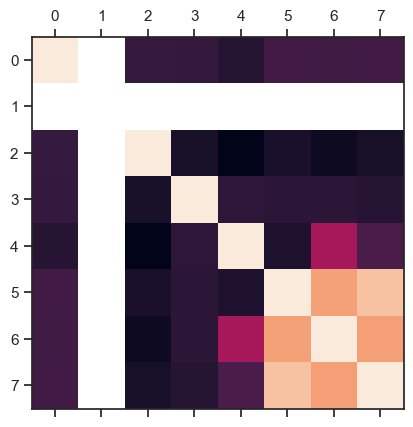

In [99]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

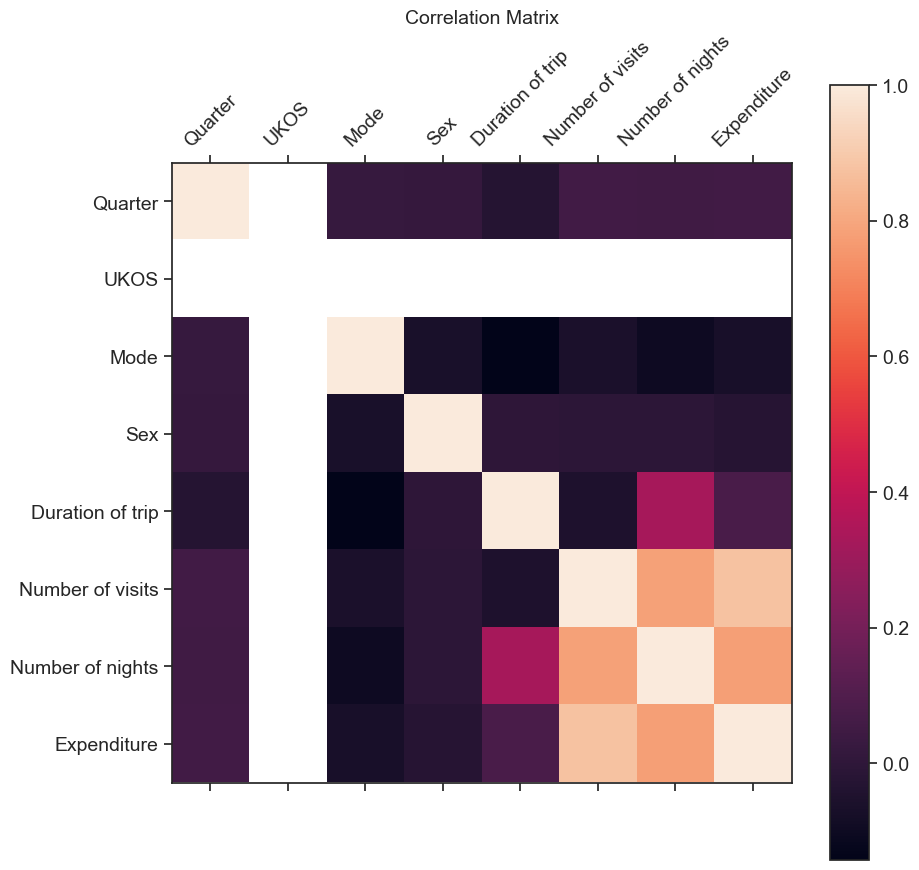

In [100]:
# Add labels and a legend to the heatmap and change its size

f = plt.figure(figsize=(10, 10)) # Figure size 
plt.matshow(sub.corr(), fignum=f.number) # Type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # X axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # Y axis labels
cb = plt.colorbar() # Add a colourbar
cb.ax.tick_params(labelsize=14) # Add font size
plt.title('Correlation Matrix', fontsize=14) # Add title
plt.savefig(os.path.join(path, '04. Visualisations', 'matplotlib_correlation_heatmap.png'))

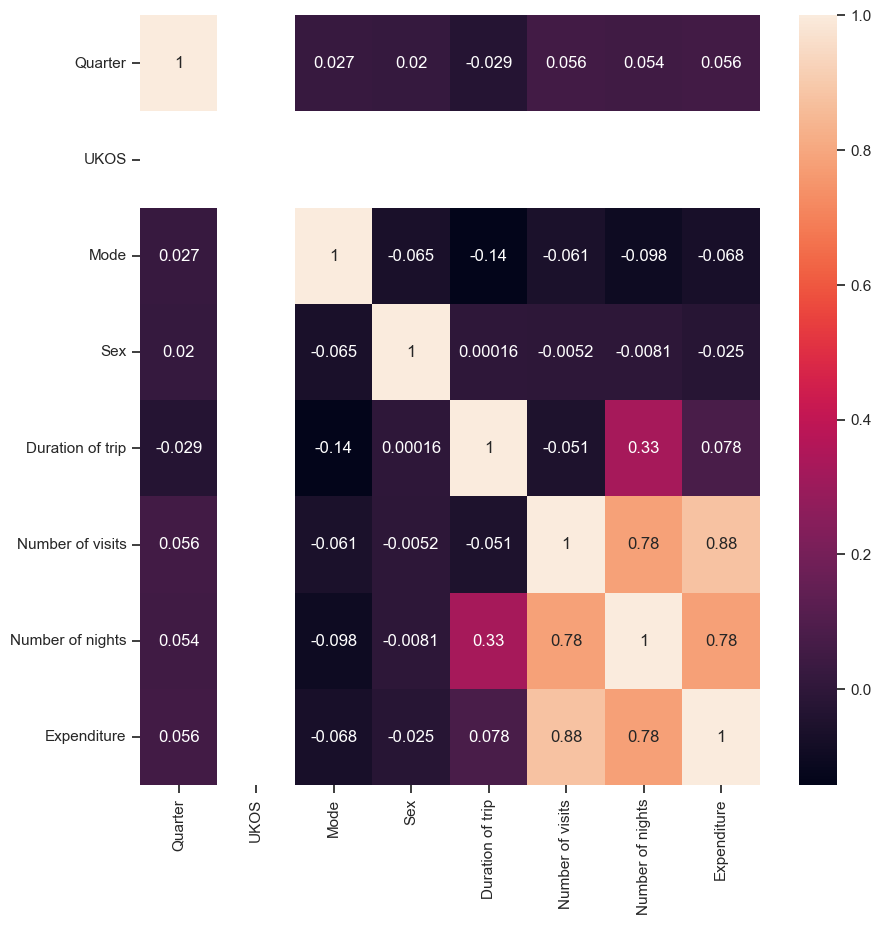

In [101]:
# Create and export a correlation heatmap with seaborn

f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
plt.savefig(os.path.join(path, '04. Visualisations', 'seaborn_correlation_heatmap.png'))

I had hoped that adding the categorical variables whose data types I had changed would help answer some of the questions I had previously posed. However, I realise that this is not the right method to use to do that as the correlation between those variables and the others are so weak.

I had also hoped that duration of trip would correlate more strongly with number of nights, but that is also clearly not the case.

The relationships between Number of nights, Number of visits and Expenditure are much stronger, which was to be expected - it makes sense that these variables would have a positive correlation with each other.

## Scatterplots

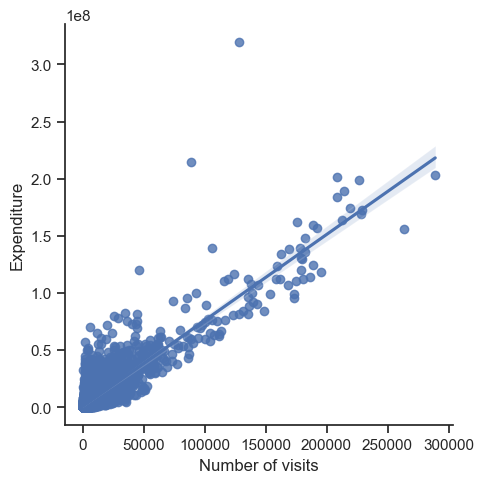

In [102]:
# Create a scatterplot for the Number of visits and Expenditure variables in seaborn

sns.lmplot(x = 'Number of visits', y = 'Expenditure', data = sub)

plt.savefig(os.path.join(path, '04. Visualisations', 'scatterplot_visit_expenditure.png'))

The scatterplot shows a steep trend line with many of the points near it, signifying a strong correlation. While there are a few outliers (the point at Expenditure = approximately 1.4 and Number of visits = approximately 110,000, for example), the scatterplot does confirm what the correlation matrix showed.

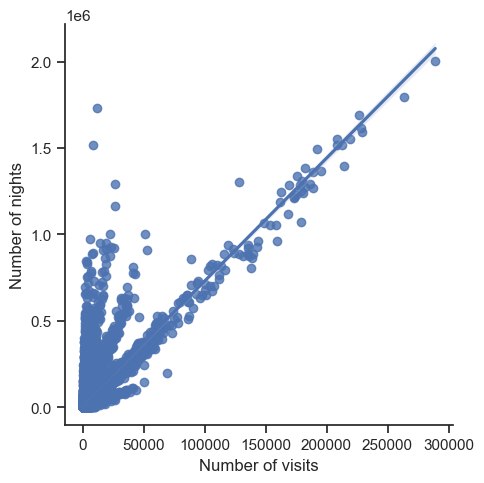

In [103]:
# Create a scatterplot for the Number of visits and Expenditure variables in seaborn

sns.lmplot(x = 'Number of visits', y = 'Number of nights', data = sub)

plt.savefig(os.path.join(path, '04. Visualisations', 'scatterplot_visit_night.png'))

Although many of the points are travelling up the steep trend line, there are a number that are travelling vertically. The relationship between the two variables is not linear, proving that the correlation coefficient is not the best way of viewing this relationship.

### Pair plots

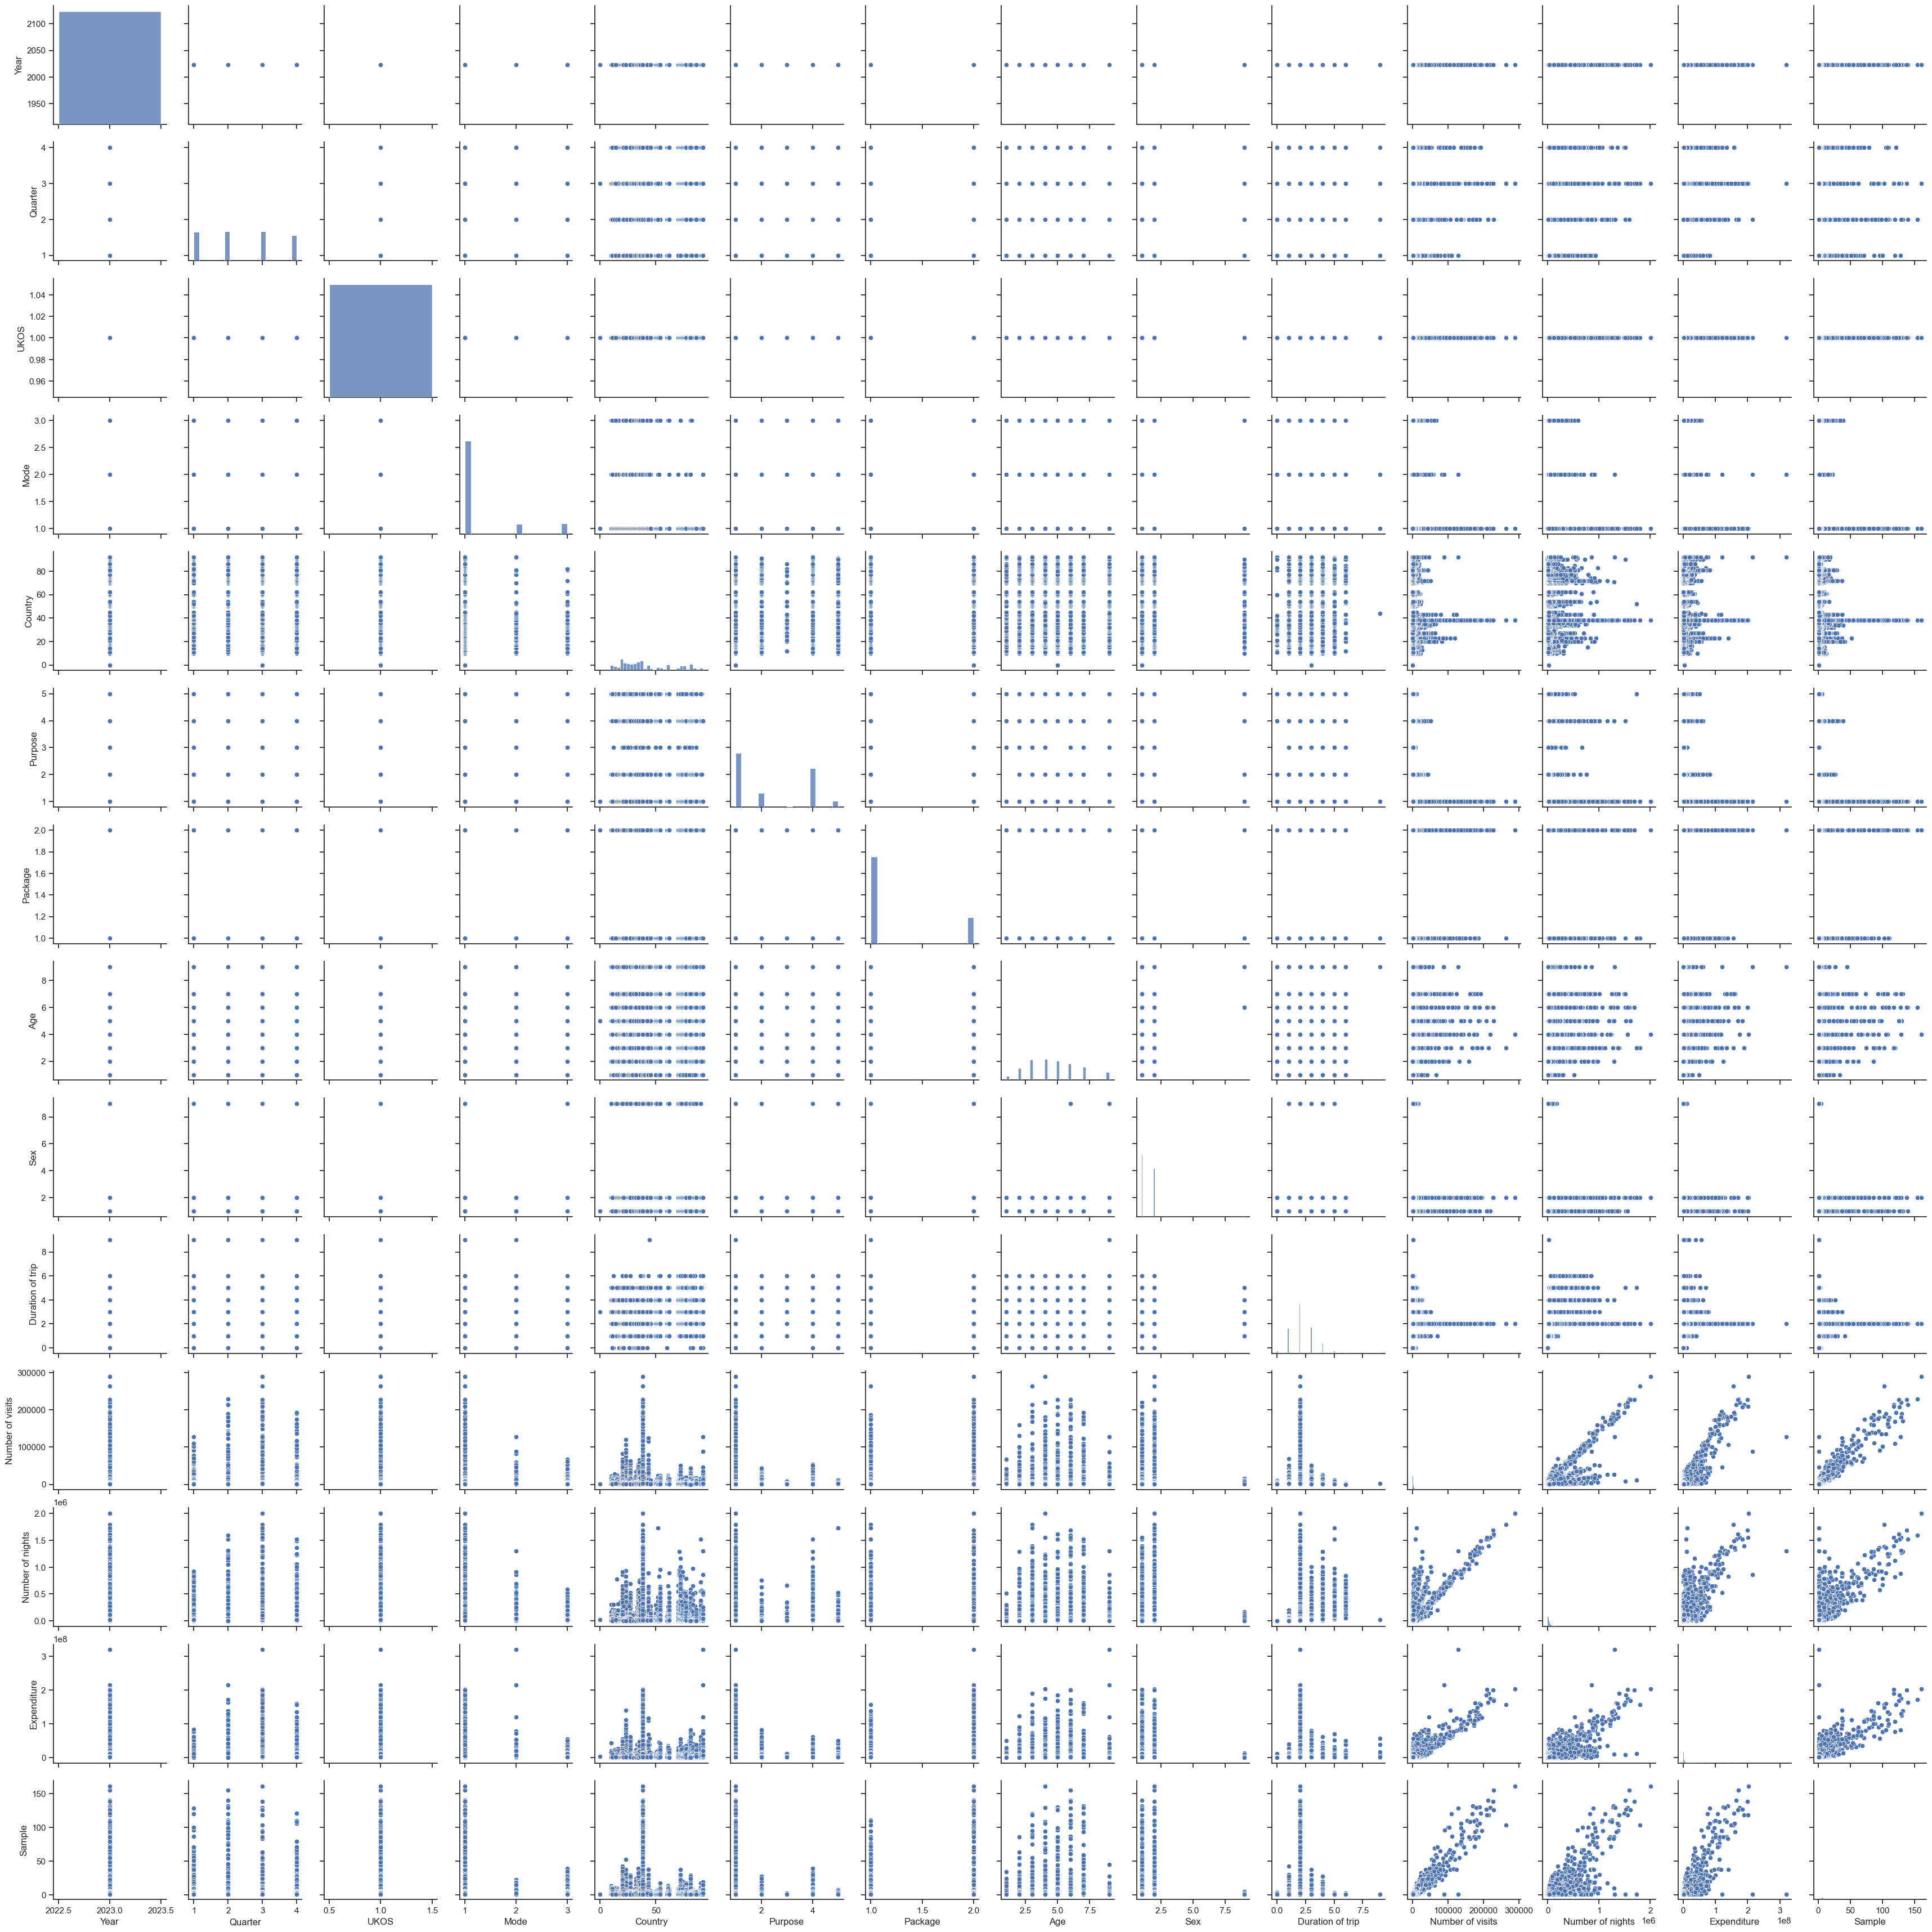

In [104]:
# Create a pair plot 

g = sns.pairplot(df)
plt.savefig(os.path.join(path, '04. Visualisations', 'pair_plot.png'))

After viewing this pair plot, I am looking forward to further exploring the relationship between Country and Expenditure, Number of visits and Number of nights. I can see that some countries are more popular than others and that the data on which countries (although not the most popular) changes between the variables.

I would like to have a deeper exploration of the relationship between Number of visits and Number of nights, as I would like to see in greater depth the meaning beneath the very much non-linear scatterplot.

The relationship between Duration of trip and Expenditure looks interesting, but it would be good to see if that can be explored further here or if it requires a different type of analysis.

One of the questions I posed in the last task asked if longer stays for UK residents abroad was linked to the period in which they travel. Although I can't answer that fully here (as I can't differentiate between UK and Overseas residents easily when viewing other variables), I will be able to see which period of travel is more popular when looking at the relationship between Quarter and Number of nights.


## Categorical plots

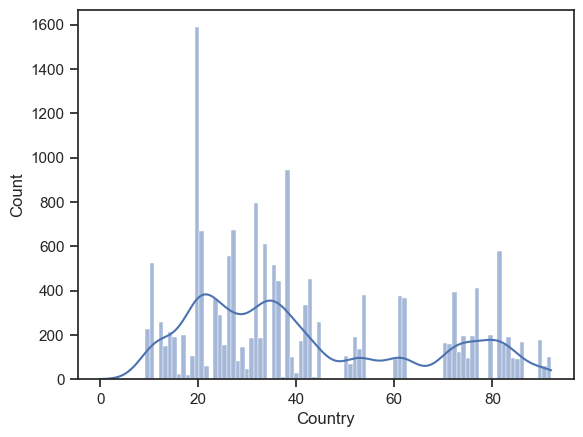

In [105]:
# Create histogram to visualize the distribution of the 'Country' variable 

sns.histplot(df['Country'], bins = 100, kde = True)
plt.savefig(os.path.join(path, '04. Visualisations', 'Hist_Country.png'))

In [106]:
# Create a categorical variable that splits the 'Country' column into continental categories

In [107]:
df.loc[(df['Country'] >= 0) & (df['Country'] <= 45 ), 'Continent'] = 'Europe'

In [108]:
df.loc[(df['Country'] >= 50) & (df['Country'] <= 54 ), 'Continent'] = 'Africa'

In [109]:
df.loc[(df['Country'] >= 60) & (df['Country'] <= 77 ), 'Continent'] = 'Asia'

In [110]:
df.loc[(df['Country'] >= 80) & (df['Country'] <= 86 ), 'Continent'] = 'North and South America'

In [111]:
df.loc[(df['Country'] >= 90) & (df['Country'] <= 92 ), 'Continent'] = 'Oceania and other countries'

In [112]:
df['Continent'].value_counts(dropna = False)

Continent
Europe                         11575
Asia                            2563
North and South America         1482
Africa                           876
Oceania and other countries      336
Name: count, dtype: int64

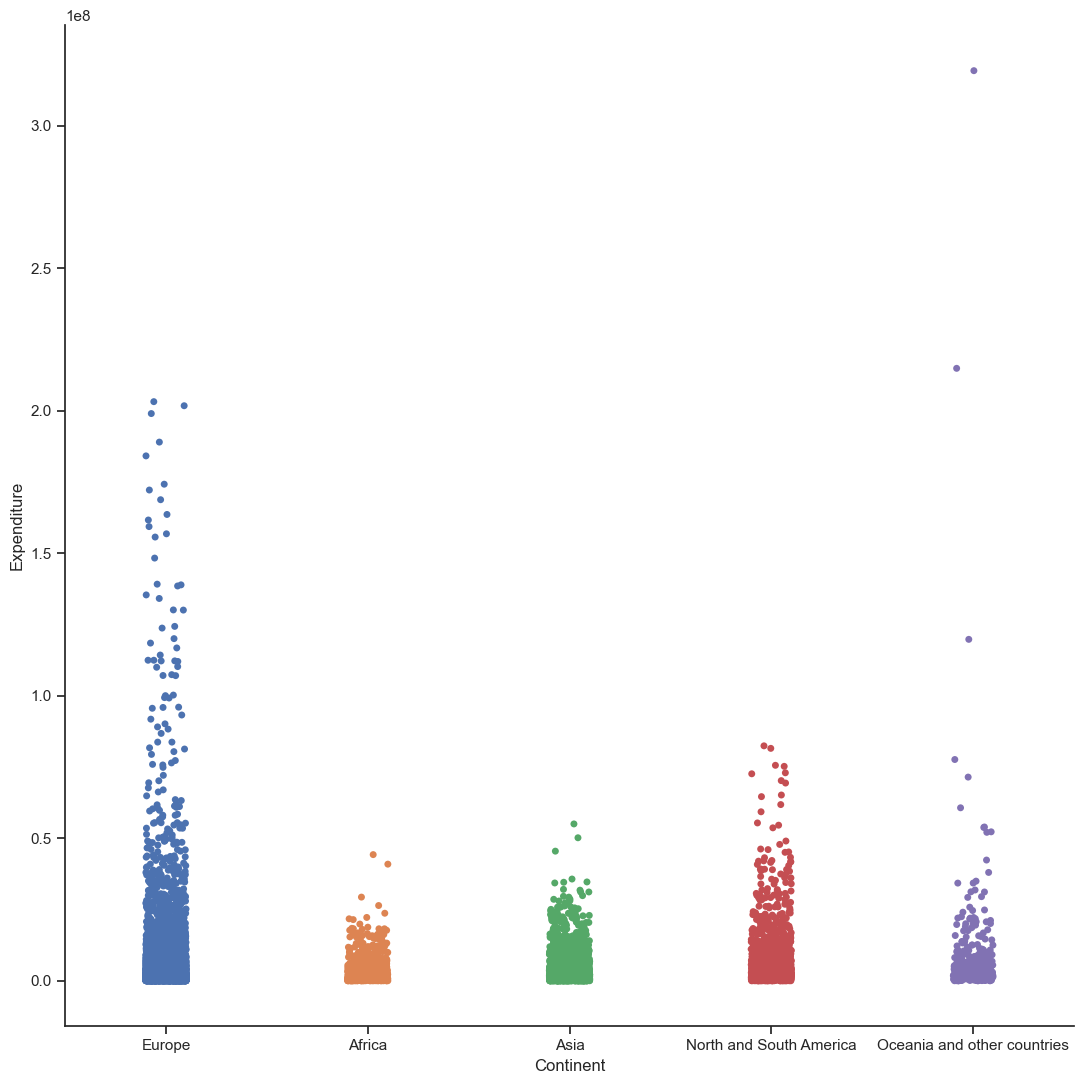

In [113]:
# Create a categorical plot in seaborn using the 'Continent' categories created above, compared to Expenditure

sns.set(style='ticks')
g = sns.catplot(x="Continent", y='Expenditure', hue='Continent', height=11, aspect=20/20, data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_country_expend.png'))

As the continent in which the UK is located, it is understandable that Europe is where the majority of expenditure is spent (or most of the spending come from, depending on whether they are UK or Overseas residents. However, it is interesting to see that North and South America, which are reasonably expensive to get to and from, contributed to expenditure as much as shown in the above plot.

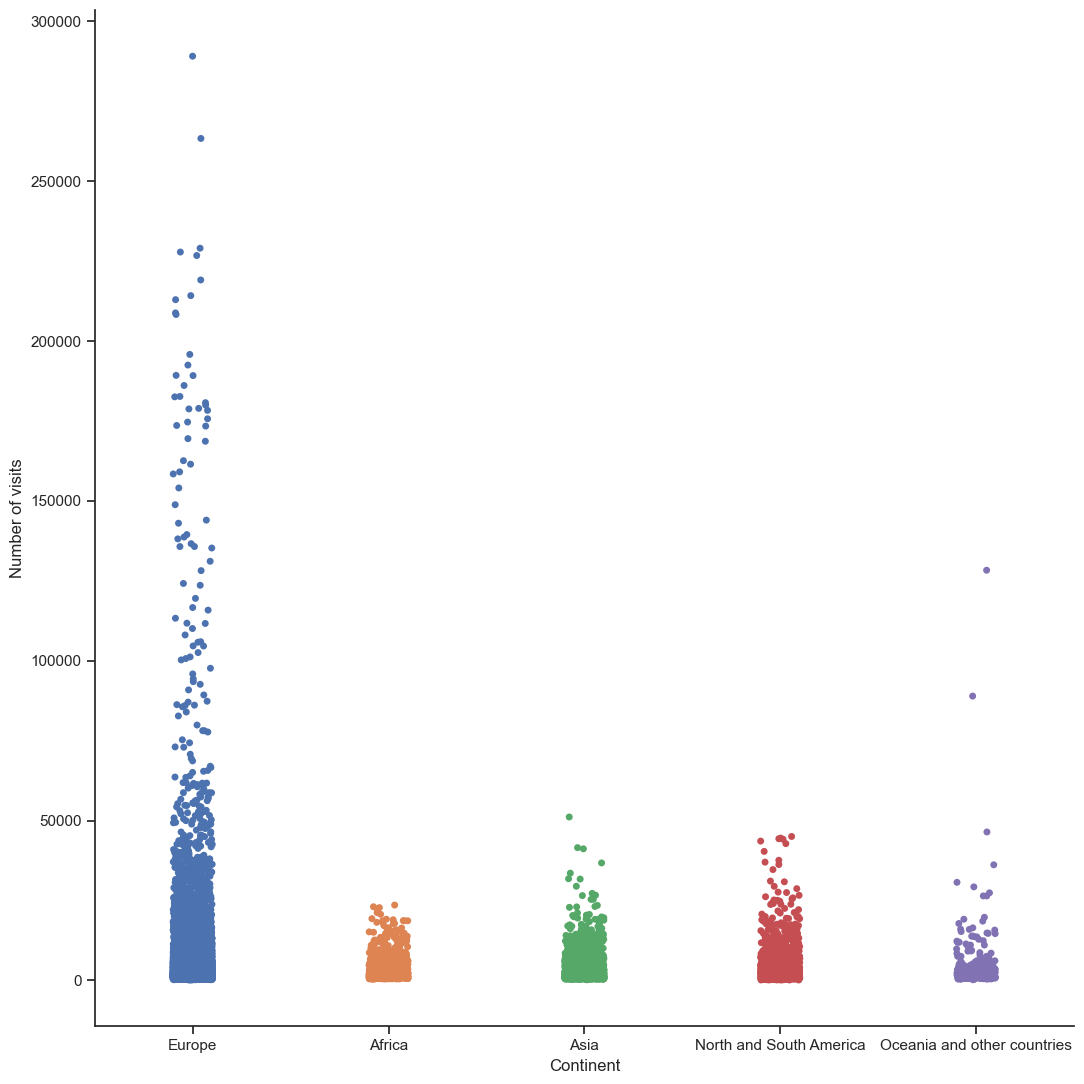

In [114]:
# Create a categorical plot in seaborn using the 'Continent' categories created above, compared to 'Number of visits'

sns.set(style='ticks')
g = sns.catplot(x="Continent", y='Number of visits', hue='Continent', height=11, aspect=20/20, data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_country.visits.png'))

Where as the bulk of expenditure did not seem to have as much difference as expected between Europe, North and South America and even Asia, the number of visits from travellers to and from Europe is in stark contrast to those from other continents. While even the outliers from Asia and the Americas tail off around the 50,000 mark, there are many more points above that for the number of visits to and from Europe.

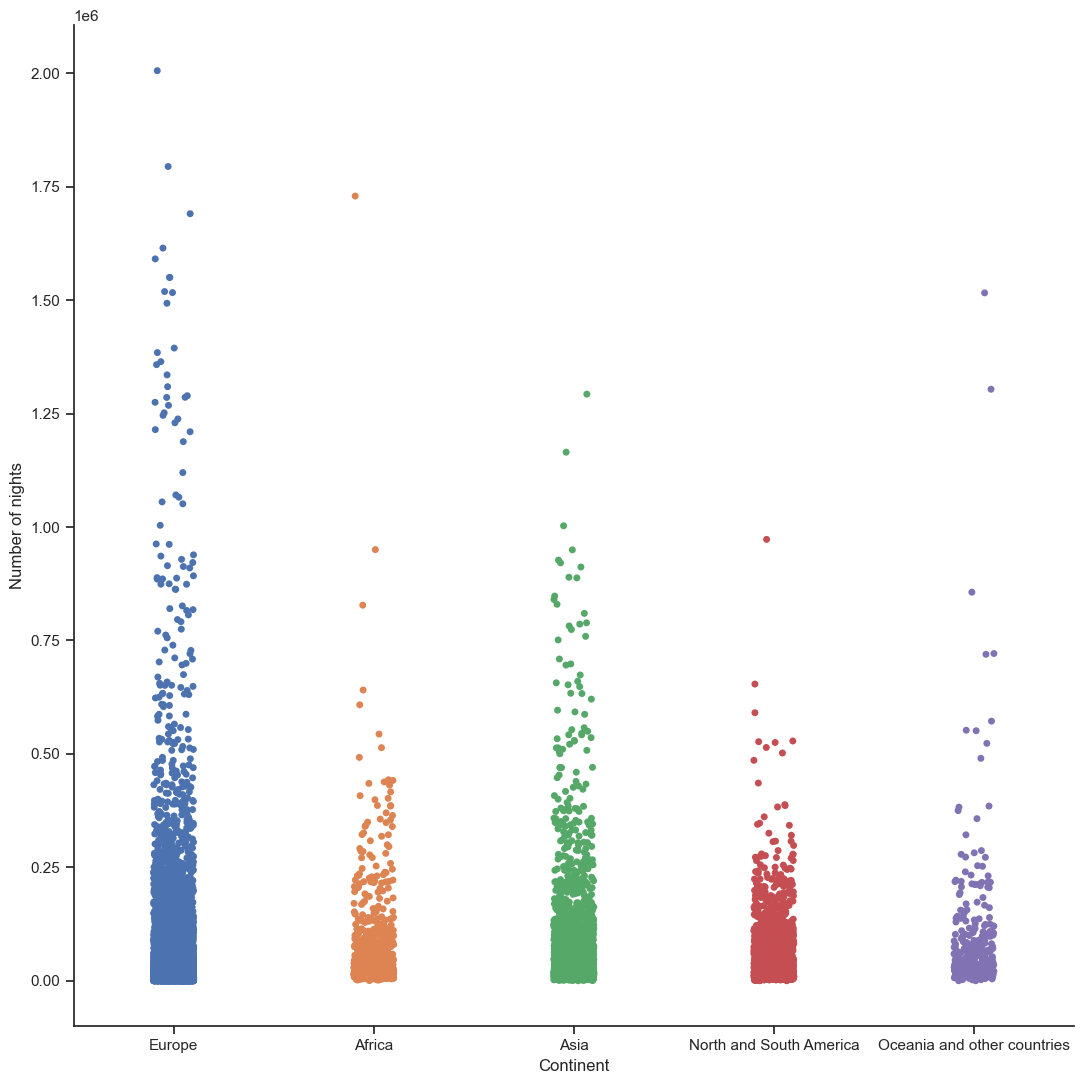

In [115]:
# Create a categorical plot in seaborn using the 'Continent' categories created above, compared to 'Number of nights'

sns.set(style='ticks')
g = sns.catplot(x="Continent", y='Number of nights', hue='Continent', height=11, aspect=20/20, data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_country.nights.png'))

As the number of nights relates to the total number of nigths spent whilst on a visit, it is interesting to see Asia more heavily represented here than in the previous two plots. Without more information on this, it cannot be defined exactly why that might be the case, but it might be because those travelling from further away may visit fewer times, but spend longer on each visit to maximise value for money.

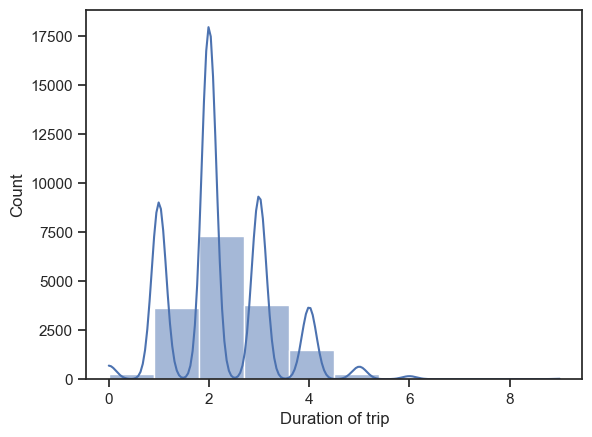

In [116]:
# Create histogram to visualize the distribution of the 'Duration of trip' variable 

sns.histplot(df['Duration of trip'], bins = 10, kde = True)
plt.savefig(os.path.join(path, '04. Visualisations', 'Hist_Duration.png'))

The categories used in the histogram above relate to trip durations as follows:

0 -	Nil Stay

1 - 1–3 nights

2 - 4–13 nights

3 - 14–27 nights

4 - 28–90 nights

5 - 91–182 nights (3-6 months)

6 - 183 nights – 1 year

9 - Stay not known

In [117]:
# Create a categorical variable that splits the 'Duration of trip' column into 'Length of stay' categories

In [118]:
df.loc[(df['Duration of trip'] == 0), 'Length of stay'] = 'None - in transit'

In [119]:
df.loc[(df['Duration of trip'] == 1), 'Length of stay'] = 'Short stay'

In [120]:
df.loc[(df['Duration of trip'] >= 2) & (df['Duration of trip'] <= 3 ), 'Length of stay'] = 'Medium stay'

In [121]:
df.loc[(df['Duration of trip'] >= 4) & (df['Duration of trip'] <= 8 ), 'Length of stay'] = 'Long stay'

In [122]:
df.loc[(df['Duration of trip'] == 9), 'Length of stay'] = 'Unknown'

In [123]:
df['Length of stay'].value_counts(dropna = False)

Length of stay
Medium stay          11081
Short stay            3653
Long stay             1810
None - in transit      280
Unknown                  8
Name: count, dtype: int64

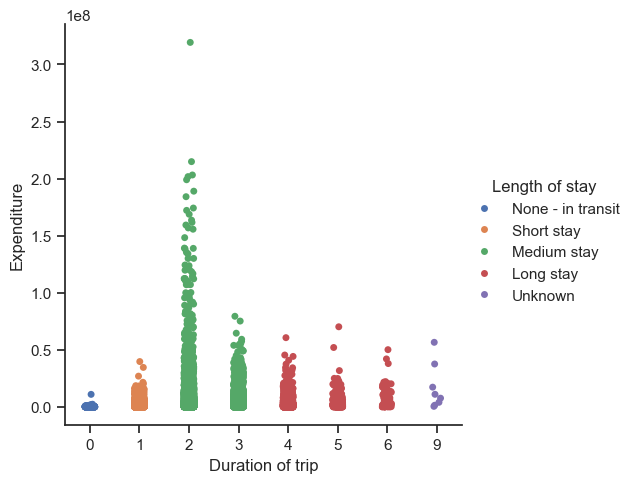

In [124]:
# Create a categorical plot in seaborn using the 'Length of stay' categories created above, compared to Expenditure

sns.set(style="ticks")
g = sns.catplot(x="Duration of trip", y="Expenditure", hue="Length of stay", data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_duration_expend_1.png'))

It is clear that much more money was spent in the Medium stay category (stays between 21 days and 90 days) than any other. Is this because there were more visits undertaken in that category?

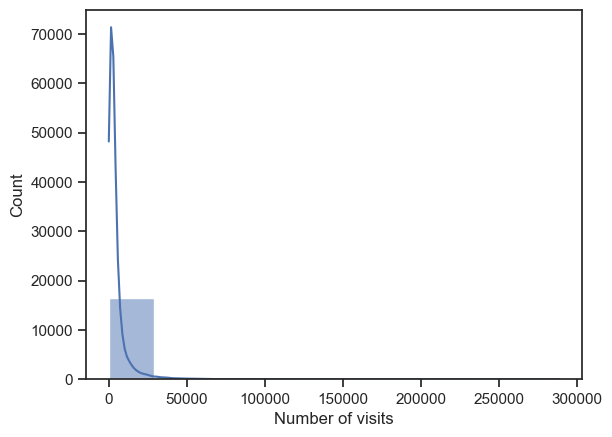

In [125]:
# Create histogram to visualize the distribution of the 'Duration of trip' variable 

sns.histplot(df['Number of visits'], bins = 10, kde = True)
plt.savefig(os.path.join(path, '04. Visualisations', 'Hist_Visits.png'))

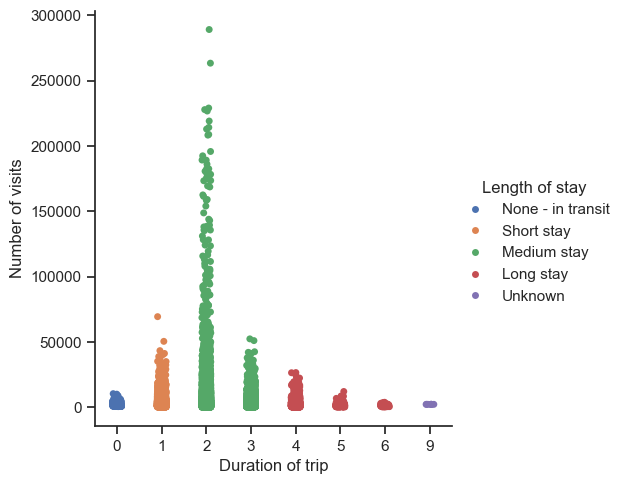

In [126]:
# Create a categorical plot in seaborn using the 'Length of stay' categories created above

sns.set(style="ticks")
g = sns.catplot(x="Duration of trip", y="Number of visits", hue="Length of stay", data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_duration_visits.png'))

We can see that the number of visits is broadly in line with the length of stay, which would explain why expenditure is so much higher in the Medium stay category.

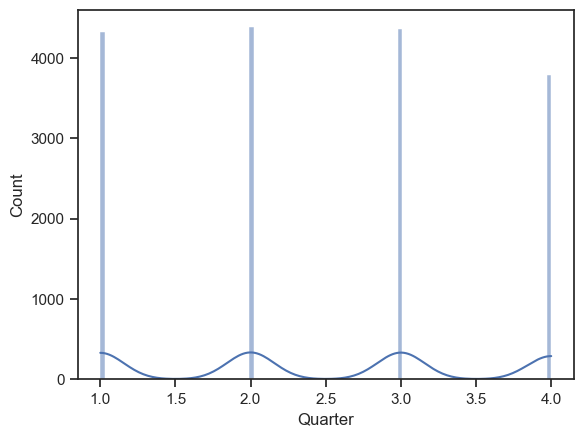

In [127]:
# Create histogram to visualize the distribution of the 'Quarter' variable 

sns.histplot(df['Quarter'], bins = 100, kde = True)
plt.savefig(os.path.join(path, '04. Visualisations', 'Hist_Quarter.png'))

There is not a pronounced difference between travellers holidaying in each season, but there are more travellers between July and September than in the other periods.

In [128]:
# Create a categorical variable that splits the 'Quarter' column into categories

In [129]:
df.loc[(df['Quarter'] == 1), 'Period'] = 'Jan - Mar'

In [130]:
df.loc[(df['Quarter'] == 2), 'Period'] = 'Apr - Jun'

In [131]:
df.loc[(df['Quarter'] == 3), 'Period'] = 'Jul - Sep'

In [132]:
df.loc[(df['Quarter'] == 4), 'Period'] = 'Oct - Dec'

In [133]:
df['Period'].value_counts(dropna = False)

Period
Apr - Jun    4380
Jul - Sep    4354
Jan - Mar    4316
Oct - Dec    3782
Name: count, dtype: int64

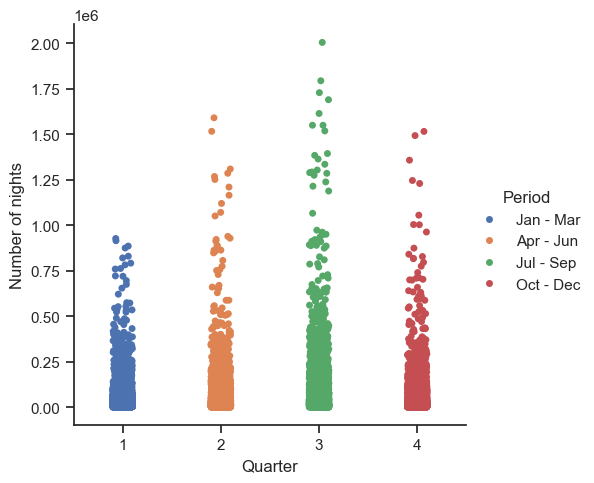

In [134]:
# Create a categorical plot in seaborn using the 'Period' categories created above

sns.set(style='ticks')
g = sns.catplot(x='Quarter', y='Number of nights', hue='Period', data=df)
plt.savefig(os.path.join(path, '04. Visualisations', 'Cat_quarter_nights.png'))

The histogram above appears to show that the period between October and December is the quietest period for holiday travel. However, the category plot shows that more nights per visit occur between October and December than January and March. As the former period takes in Christmastime, it is possible that the number of nights away is increased by those travelling 'home' to see family and friends. More analysis (or possibly data) would be needed to confirm that.

## 4. Revisiting questions asked in Task 6.1

As the questions I posed in the previous task concentrated largely on the difference between travel undertaken by UK residents compared to that by overseas residents, the analysis undertaken here was not fully conducive to answering them. 

However, this analysis helped answer some of the questions more broadly: 

* The most popular continent for travellers from the UK, or the continent in which the most travellers to the UK came from, is Europe, which was also the continent in/from which the most expenditure came, followed by North and South America. 

* Although the most number of nights was once again spent in or by those from Europe, Asia came next in this case. More data would be needed for the reason for this, but it is possibly because those travelling from or to further away spend more nights per visit to get maximum value for money.

* Travellers spent more on medium stay trips (those between 4 and 27 nights) than other durations, which is likely because trips of that duration were more popular than the others.

Other questions that this analysis has brought up are:

* Visits last for more nights in the period covering Christmas. Is this because most travellers are 'going home' to see family and friends in this period?

* Which destinations/places from which overseas residents travel are most popular for each duration of trip? Are longer durations linked to destinations that are furthest away from the UK?

## 5. Hypotheses

There are three hypotheses I would like to test.

1. That Spain will be the most popular country for visitors from the UK.

2. Asia will be the continent that, after Europe, for visits of longer durations.

3. The period between October and December will be the period that has the highest number of travellers visiting friends and family.

In [135]:
df.to_csv(os.path.join(path, '02. Data','Prepared Data', 'Travelpac_cleaned_6_2.csv'))